### Importing Libraries 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import f1_score
import seaborn as sns

### Importing datasets

In [2]:
df_train = pd.read_csv('train_wn75k28.csv')
df_test = pd.read_csv('test_Wf7sxXF.csv')
df_train.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


### Checking the info of the training dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

### Visualization

/home/chinmayee/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buy', ylabel='count'>

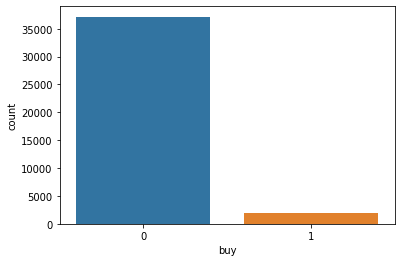

In [4]:
sns.countplot(df_train['buy'])

### Checking info of the testing dataset

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

### Checking the null values

In [6]:
print('\nTrain dataset null values :', df_train.isnull().sum())
print('\nTest dataset null values :', df_test.isnull().sum())



Train dataset null values : id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

Test dataset null values : id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activit

### Feature Engineering

In [7]:
# Creating a new feature from the signup_date feature using isnull(), and changing the dtype to int
df_train['signup_date_isnull']  = df_train['signup_date'].isnull().astype(int)
df_test['signup_date_isnull']  = df_test['signup_date'].isnull().astype(int)

In [8]:
# Here a new feature signup_month is extracted from the signup_date column
df_train['signup_month'] = pd.to_datetime(df_train['signup_date']).dt.month
df_test['signup_month'] = pd.to_datetime(df_test['signup_date']).dt.month

#### Filling the null values

In [9]:
# Filling the null values with mode
df_train['signup_month'] = df_train['signup_month'].fillna(df_train['signup_month'].mode()[0])
df_test['signup_month'] = df_test['signup_month'].fillna(df_train['signup_month'].mode()[0])

#### Changing datatype

In [10]:
# changing the dtype to datetime format

df_train['created_at'] = pd.to_datetime(df_train.created_at)
df_test['created_at'] = pd.to_datetime(df_test.created_at)

In [11]:
# Extracting new features from the created_at column for both train and test dataset

df_train['created_month'] = df_train['created_at'].dt.month
df_train['created_week'] = df_train['created_at'].dt.isocalendar().week.astype("int64")
df_train['created_day'] = df_train['created_at'].dt.day

df_test['created_month'] = df_test['created_at'].dt.month
df_test['created_week'] = df_test['created_at'].dt.isocalendar().week.astype("int64")
df_test['created_day'] = df_test['created_at'].dt.day


### Dropping unnecessary features

In [12]:
X_train = df_train.drop(['signup_date','buy', 'products_purchased',
                         'created_at'], axis=1)
X_test = df_test.drop(['signup_date','products_purchased',
                       'created_at'], axis=1)
y_train = df_train['buy']

### Checking the null values again

In [13]:
print('\nTrain dataset null values :', df_train.isnull().sum())
print('\nTest dataset null values :', df_test.isnull().sum())



Train dataset null values : id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
signup_date_isnull          0
signup_month                0
created_month               0
created_week                0
created_day                 0
dtype: int64

Test dataset null values : id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_ac

### Standardising the dataset

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


### Defining the model

In [15]:

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05,
                           max_depth=4, random_state=1,
                           use_label_encoder=True)

### Fitting the model

In [16]:
clf = model.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test = clf.predict(X_test)

train_score = f1_score(y_train, y_train_pred)


print(f'XGboost train accuracy 'f'{train_score:.3f}')

/home/chinmayee/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost train accuracy 0.734


In [17]:
Submission = pd.DataFrame({'id':df_test['id'].values})
Submission['buy']=y_test


### Writing prediction to a csv file

In [18]:
Submission.to_csv('submission.csv', index=False)

## Approach

1. Extracted new features from the existing ones and filled up the null values.  THe new features are extracted from the created_at and signup_date feature. Changed the dtypes. 
2. Then dropped the unwanted features like products_purchased signed_up date etc.
3. I have used the XGBoost classifier to train the model and predicted the output label. First I had used the RandomForest Classifier then LGBM, eventually I tried XGBoost which gave me better score.
